<a href="https://colab.research.google.com/github/RojaCM/NLP/blob/main/Loan_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Loan Data Analysis

1. Load the dataset that is given to you

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('/content/loan_data (1).csv')

In [3]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(1923, 122)

2.  Check for null values in the dataset

In [5]:
data1=data.copy()

In [6]:
null=data.isnull().sum()

In [7]:
count=0

for i in data.columns:
  if data[i].isnull().any():
    count = count+1

In [8]:
count

121

#HANDLING NULL VALUES

In [9]:
# Calculate mean and median for each column with missing values
mean_values = data.mean()
median_values = data.median()

<ipython-input-9-a1cde15b870d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = data.mean()
<ipython-input-9-a1cde15b870d>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = data.median()


In [10]:
# Fill missing values with mean or median
data_filled = data.fillna(median_values)  # or median_values

In [11]:
sum(data_filled.isnull().any())

16

In [12]:
data_filled.columns[data_filled.isnull().any()]

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [13]:
# Fill missing values with mode
mode_values = data.mode().iloc[0]
data_filled1= data_filled.fillna(mode_values)

In [14]:
sum(data_filled1.isnull().any())

0

#There are 85 columns with null values present

3.Print percentage of default to payer of the dataset for the TARGET column

In [15]:
data['TARGET'].value_counts()

0.0    1782
1.0     140
Name: TARGET, dtype: int64

In [16]:
total=len(data_filled1)

In [17]:
len_default=data_filled1['TARGET'].sum()

In [18]:
percentage_default=np.round(len_default/total *100,3)

In [19]:
percentage_default

7.28

In [20]:
print("Percentage of defaults:", percentage_default, "%")

Percentage of defaults: 7.28 %


## Now data_encoded contains the dataset with one-hot encoded categorical columns

In [21]:

cat_cols=data_filled1.select_dtypes(include=object)

In [22]:

cat_cols.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [23]:
cat_cols=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [24]:



# Convert categorical columns to one-hot encoded columns
data_encoded = pd.get_dummies(data_filled1, columns=cat_cols)

In [25]:
data_encoded.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,0,0,0,0,0,0,1,0,1,0
3,100006,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,0,0,0,0,0,0,1,0,1,0
4,100007,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,0,0,0,0,0,0,1,0,1,0


In [26]:
data_encoded.shape

(1923, 237)

In [27]:
data2=data_encoded.copy()

# Balance the dataset if the data is imbalanced

In [28]:
import pandas as pd
from imblearn.over_sampling import SMOTE


# Separate features and target variable
X = data_encoded.drop(columns=["TARGET"])
y = data_encoded["TARGET"]

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [29]:
print(X_resampled.shape, y_resampled.shape)

(3566, 236) (3566,)


In [30]:
X_resampled.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,...,0,0,0,0,0,0,1,0,1,0
3,100006,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,...,0,0,0,0,0,0,1,0,1,0
4,100007,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,...,0,0,0,0,0,0,1,0,1,0


In [31]:
 y_resampled.nunique()

2

In [32]:
y_resampled.value_counts()

1.0    1783
0.0    1783
Name: TARGET, dtype: int64

#Plot the balanced data or imbalanced data

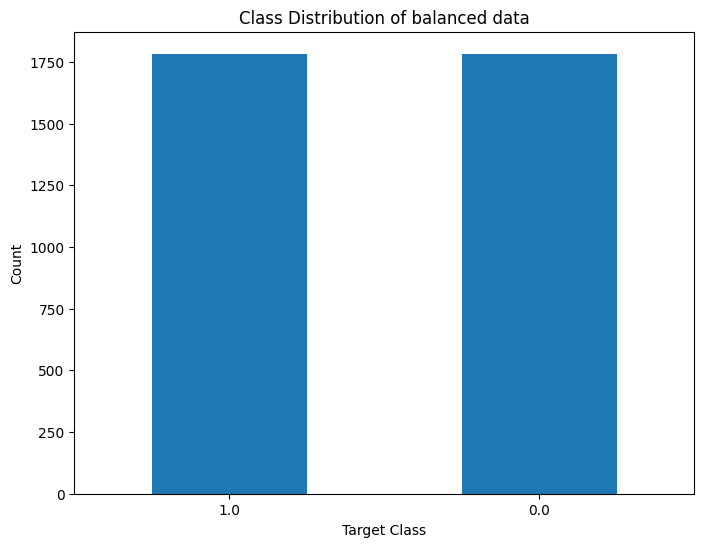

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot class distribution
plt.figure(figsize=(8, 6))
y_resampled.value_counts().plot(kind="bar")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.title("Class Distribution of balanced data")
plt.xticks(rotation=0)
plt.show()

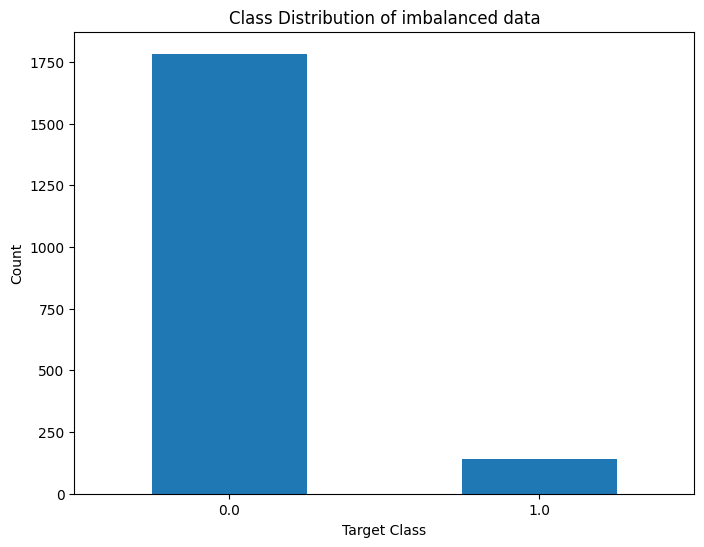

In [34]:

# Plot class distribution
plt.figure(figsize=(8, 6))
data_filled1['TARGET'].value_counts().plot(kind="bar")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.title("Class Distribution of imbalanced data")
plt.xticks(rotation=0)
plt.show()

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense




# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_split=0.2)
#tate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)




Epoch 1/5
72/72 [==============================] - 2s 6ms/step - loss: 0.3156 - accuracy: 0.8891 - val_loss: 0.1751 - val_accuracy: 0.9562
Epoch 2/5
72/72 [==============================] - 0s 3ms/step - loss: 0.1068 - accuracy: 0.9654 - val_loss: 0.1704 - val_accuracy: 0.9545
Epoch 3/5
72/72 [==============================] - 0s 4ms/step - loss: 0.0662 - accuracy: 0.9759 - val_loss: 0.1761 - val_accuracy: 0.9615
Epoch 4/5
72/72 [==============================] - 0s 3ms/step - loss: 0.0451 - accuracy: 0.9873 - val_loss: 0.2215 - val_accuracy: 0.9405
Epoch 5/5
23/23 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9496
Test Loss: 0.19519226253032684
Test Accuracy: 0.9495798349380493


In [36]:
# Calculate sensitivity (True Positive Rate)
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions


23/23 [==============================] - 0s 2ms/step


In [43]:
from sklearn.metrics import confusion_matrix

In [47]:
true_labels = np.array([y_test])

In [51]:
conf_matrix = confusion_matrix(y_test,y_pred_binary)

In [52]:
# Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

print("Sensitivity (True Positive Rate):", sensitivity)

Sensitivity (True Positive Rate): 0.930635838150289


In [54]:
import numpy as np
from sklearn.metrics import roc_auc_score


#calculate AUC-ROC
auc_roc = roc_auc_score(y_test,y_pred_binary)

print("AUC-ROC:", auc_roc)


AUC-ROC: 0.9490135712490575
